# Feature detection

## Harris Corner detection

As always we start with the imports

In [88]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

To start, we will use the same checkerboard image as earlier.

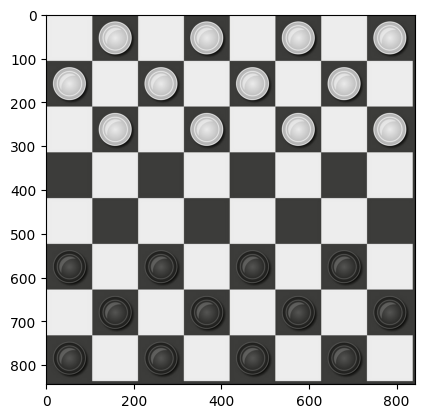

In [89]:
img = cv2.imread('checkers.png')
# Changing the order from bgr to rgb so that matplotlib can show it
b,g,r = cv2.split(img)
img = cv2.merge([r,g,b])
plt.imshow(img)

### Exercise 2a
Fill in the missing code in the next block. We would like to detect the corners of the image using the OpenCV function [`cv2.cornerHarris`](https://docs.opencv.org/4.7.0/dd/d1a/group__imgproc__feature.html#gac1fc3598018010880e370e2f709b4345). Afterwards we want to draw the location of the detected corners on the image and display it.

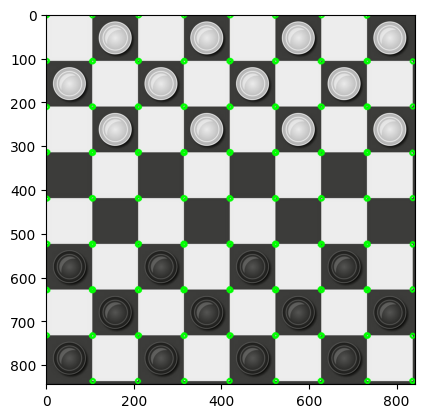

In [90]:
# Change image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

corners = cv2.cornerHarris(gray, 2, 3, 0.04)

for i in range(corners.shape[0]):
    for j in range(corners.shape[1]):
        if corners[i,j] > 0.01 * corners.max():
            cv2.circle(img, (j,i), 5, (0,255,0), 2)

# Display image
plt.imshow(img)

## Shi-Tomasi
Next we will try the Shi-Tomasi feature detection method. In OpenCV, that method is implemented as [`cv2.goodFeaturesToTrack`](https://docs.opencv.org/4.7.0/dd/d1a/group__imgproc__feature.html#ga1d6bb77486c8f92d79c8793ad995d541). 
Let's start with a different image this time.

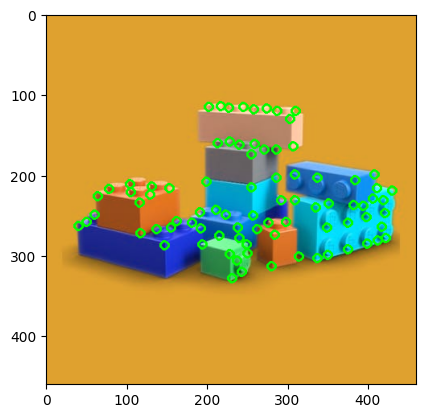

In [103]:
img = cv2.imread('Lego.jpg')
# Changing the order from bgr to rgb so that matplotlib can show it
b,g,r = cv2.split(img)
img = cv2.merge([r,g,b])
img_copy = img.copy()
gray = cv2.cvtColor(img_copy, cv2.COLOR_RGB2GRAY)

# plt.imshow(mask, cmap='gray')


corners = cv2.goodFeaturesToTrack(
    gray,
    maxCorners=200,       # max number of corners to return
    qualityLevel=0.10,    # minimum corner quality (relative to best)
    minDistance=10,        # min Euclidean distance between corners
    blockSize=7,          # size of an average block for computing a derivative covariation matrix over each pixel neighborhood
)

# Convert to int because OpenCV sometimes returns float coords
corners = np.intp(corners)

# Draw them
for c in corners:
    x, y = c.ravel()  # flatten [ [x, y] ]
    cv2.circle(img_copy, (x, y), 5, (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB))
plt.show()

# yeah idk how to make it better...

### Exercise 2b
Just like the previous exercise, detect the corners of the image by inserting the missing code, this time using the Shi-Tomasi (good features to track) method. Draw the detected corners on the image. Check the documentation of the function for help.

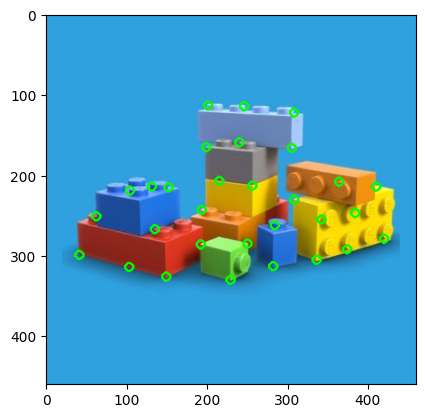

In [120]:
# Change image to grayscale
img_copy2 = img.copy()
gray = cv2.cvtColor(img_copy2, cv2.COLOR_RGB2GRAY)

### Insert goodFeaturesToTrack detector here ###
crns = cv2.goodFeaturesToTrack(
    gray,
    maxCorners=200,       # max number of corners to return
    qualityLevel=0.0005,    # minimum corner quality (relative to best)
    minDistance=40,        # min Euclidean distance between corners
    blockSize=3,          # size of an average block for computing a derivative covariation matrix over each pixel neighborhood
)
### Draw the detected corners in the original image here ###
crns = np.intp(crns)
for c in crns:
    x, y = c.ravel()  # flatten [ [x, y] ]
    cv2.circle(img_copy2, (x, y), 5, (0, 255, 0), 2)

# Display image
plt.imshow(img_copy2)

### Exercise 2c
Do a Harris corner detection on the same Lego image and compare the result with the Shi-Tomasi image.

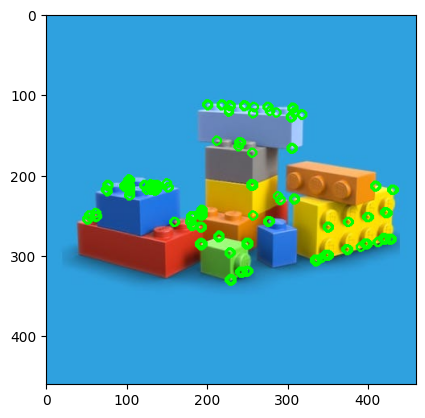

In [141]:
img_copy3 = img.copy()
gray = cv2.cvtColor(img_copy3, cv2.COLOR_RGB2GRAY)

corners = cv2.cornerHarris(gray, 
                           blockSize=3, 
                           ksize=3, 
                           k=0.04)

for i in range(corners.shape[0]):
    for j in range(corners.shape[1]):
        if corners[i,j] > 0.04 * corners.max():
            cv2.circle(img_copy3, (j,i), 5, (0,255,0), 2)

# Display image
plt.imshow(img_copy3)